We are going to check whether new actor influences the number of Screens. Perform AB testing

In [ ]:
import matplotlib
import matplotlib.pyplot as plots
%matplotlib inline
import numpy as np
import pandas as pd

In [ ]:
actor = pd.read_csv('/content/Data for repository.csv')
actor

,Movie Name,Release Period,Whether Remake,Whether Franchise,Genre,New Actor,New Director,New Music Director,Lead Star,Director,Music Director,Number of Screens,Revenue(INR),Budget(INR)
0,Golden Boys,Normal,No,No,suspense,Yes,No,No,Jeet Goswami,Ravi Varma,Baba Jagirdar,5,5000000,85000
1,Kaccha Limboo,Holiday,No,No,drama,Yes,No,Yes,Karan Bhanushali,Sagar Ballary,Amardeep Nijjer,75,15000000,825000
2,Not A Love Story,Holiday,No,No,thriller,No,No,No,Mahie Gill,Ram Gopal Verma,Sandeep Chowta,525,75000000,56700000
3,Qaidi Band,Holiday,No,No,drama,Yes,No,No,Aadar Jain,Habib Faisal,Amit Trivedi,800,210000000,4500000
4,Chaatwali,Holiday,No,No,adult,Yes,Yes,Yes,Aadil Khan,Aadil Khan,Babloo Ustad,1,1000000,1075000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,Fight Club,Holiday,No,No,action,No,Yes,No,Zayed Khan,Vikram Chopra,Pritam,375,82500000,88862500
1694,Strings Of Paasion,Normal,No,No,drama,No,Yes,Yes,Zeenat Aman,Sanghamitra Chaudhuri,Dev Sikdar,10,8000000,70000
1695,Dunno Y Na Jaane Kyun,Normal,No,No,drama,No,No,No,Zeenat Aman,Sanjay Sharma,Nikhil,20,12500000,850000
1696,Taj Mahal - An Eternal Love Story,Normal,No,No,drama,No,Yes,No,Zulfi Sayed,Akbar Khan,Naushad,135,100000000,31065000


In [ ]:
actor_and_screens = actor[['New Actor', 'Number of Screens']]
actor_and_screens

,New Actor,Number of Screens
0,Yes,5
1,Yes,75
2,No,525
3,Yes,800
4,Yes,1
...,...,...
1693,No,375
1694,No,10
1695,No,20
1696,No,135


In [ ]:
New_actor = actor_and_screens['Number of Screens'] [actor_and_screens['New Actor'] == "Yes"]
New_actor

0          5
1         75
3        800
4          1
5         10
        ... 
1679       5
1680       2
1681       2
1682      10
1685    1750
Name: Number of Screens, Length: 455, dtype: int64

In [ ]:
old_actor = actor_and_screens['Number of Screens'] [actor_and_screens['New Actor'] == "No"]
old_actor

2        525
7         30
8       1550
9        500
10       675
        ... 
1693     375
1694      10
1695      20
1696     135
1697      30
Name: Number of Screens, Length: 1243, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5a1d19dee0>,
      dtype=object)

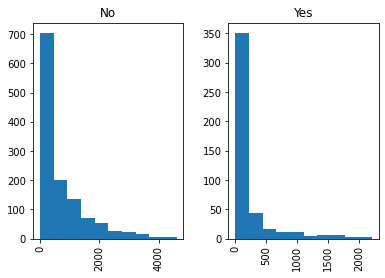

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
actor_and_screens.hist(by ='New Actor')

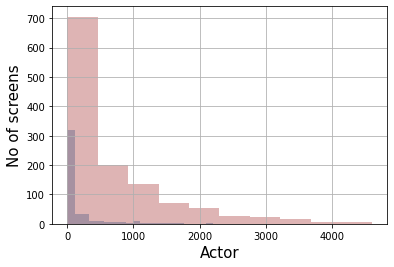

In [ ]:
import seaborn as sns
New_actor.hist(histtype='stepfilled', alpha=.5, bins=20)   # default number of bins = 10
old_actor.hist(histtype='stepfilled', alpha=.5, color=sns.desaturate("indianred", .75), bins=10)
plt.xlabel('Actor',fontsize=15)
plt.ylabel('No of screens',fontsize=15)
plt.show()

The distribution of the no of screens of the new actors appears to be shifted slightly to the left of the distribution corresponding to old actors. The number of screens of actors who are new seem lower, on average than the number of screens of old actors.

In [ ]:
means_table = actor_and_screens.groupby('New Actor').mean()
means_table

,Number of Screens
New Actor,
No,685.238134
Yes,194.846154


In [ ]:
observed_difference = means_table['Number of Screens'][1] - means_table['Number of Screens'][0]

In [ ]:
actor_and_screens

,New Actor,Number of Screens
0,Yes,5
1,Yes,75
2,No,525
3,Yes,800
4,Yes,1
...,...,...
1693,No,375
1694,No,10
1695,No,20
1696,No,135


In [ ]:
shuffled = actor_and_screens.sample(1698,replace = False)
shuffled

,New Actor,Number of Screens
419,Yes,1500
912,No,200
347,No,1000
522,No,1
64,No,2
...,...,...
647,No,225
1463,Yes,2100
1588,No,200
1567,No,2900


In [ ]:
shuffled_weights = shuffled['Number of Screens']
original_and_shuffled= actor_and_screens.assign(shuffled_weights=shuffled_weights.values )
original_and_shuffled

,New Actor,Number of Screens,shuffled_weights
0,Yes,5,1500
1,Yes,75,200
2,No,525,1000
3,Yes,800,1
4,Yes,1,2
...,...,...,...
1693,No,375,225
1694,No,10,2100
1695,No,20,200
1696,No,135,2900


In [ ]:
all_group_means= original_and_shuffled.groupby('New Actor').mean()
all_group_means

,Number of Screens,shuffled_weights
New Actor,,
No,685.238134,564.209171
Yes,194.846154,525.481319


In [ ]:
difference = all_group_means['shuffled_weights'][0]- all_group_means['shuffled_weights'][1]
difference

38.72785267829511

In [ ]:
import numpy as np
import array
differences = np.zeros(3000)
for i in np.arange(3000):
    actor_and_screens = actor[['New Actor', 'Number of Screens']]
    shuffled = actor_and_screens.sample(1698,replace = False)
    shuffled_weights = shuffled['Number of Screens']
    original_and_shuffled = actor_and_screens.assign(shuffled_weights=shuffled_weights.values )
    all_group_means= original_and_shuffled.groupby('New Actor').mean()
    difference = all_group_means['shuffled_weights'][0]- all_group_means['shuffled_weights'][1]
    differences[i] = difference
differences

array([ 41.35186937, -43.39726468, -12.56656971, ...,  29.18351737,
        27.28005446,   1.22603061])

In [ ]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
differences_df = pd.DataFrame(differences)
differences_df

,0
0,41.351869
1,-43.397265
2,-12.566570
3,-18.321993
4,11.725100
...,...
2995,13.928793
2996,34.605685
2997,29.183517
2998,27.280054


Observed Difference: -490.39197970171426


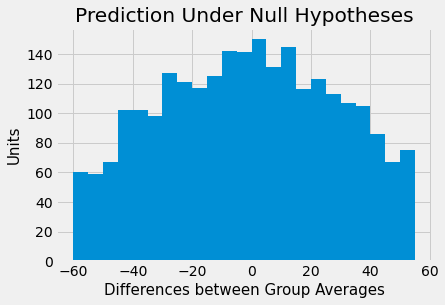

In [ ]:
differences_df.hist(bins = np.arange(-60,60,5))
plt.title('Prediction Under Null Hypotheses');
plt.xlabel('Differences between Group Averages',fontsize=15)
plt.ylabel('Units',fontsize=15);
print('Observed Difference:', observed_difference)

In [ ]:
np.count_nonzero(differences <= observed_difference)/differences.size

0.0

The observed difference in the original sample is about -490.39 ounces, which doesn't even appear on the horizontal scale of the histogram. The observed value of the statistic and the predicted behavior of the statistic under the null hypothesis are inconsistent.

The conclusion of the test is that the data support the alternative more than they support the null. The number of screens of actors who are new seem lower, on average than the number of screens of old actors.